In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
#Read the trainSet CSV file 
data = pd.read_excel('D:\\College\\Company\\KBC\\Task_Data_Scientist_Internship_Dataset.xlsx')

In [3]:
data1 = pd.read_excel('D:\\College\\Company\\KBC\\Task_Data_Scientist_Internship_Dataset.xlsx', sheet_name = 'Soc_Dem')
data2 = pd.read_excel('D:\\College\\Company\\KBC\\Task_Data_Scientist_Internship_Dataset.xlsx', sheet_name = 'Products_ActBalance')
data3 = pd.read_excel('D:\\College\\Company\\KBC\\Task_Data_Scientist_Internship_Dataset.xlsx', sheet_name = 'Inflow_Outflow')
data4 = pd.read_excel('D:\\College\\Company\\KBC\\Task_Data_Scientist_Internship_Dataset.xlsx', sheet_name = 'Sales_Revenues')

In [4]:
data4.isna().sum()

Client        0
Sale_MF       0
Sale_CC       0
Sale_CL       0
Revenue_MF    0
Revenue_CC    0
Revenue_CL    0
dtype: int64

In [5]:
age_mismatch = list()
for index, x in data1.iterrows():    
    if x['Age'] < (x['Tenure']/12) or x['Age'] == 0:
        age_mismatch.append(x['Client'])
print(age_mismatch)

[225, 1231, 316, 1160, 682, 1063, 322, 1499, 1561, 638, 1431, 485, 1372, 1256, 391, 23, 1529, 878, 394, 672, 1241, 544, 1493, 1056, 859, 1583, 350, 1591, 1586, 1169, 490, 1409, 509, 785, 158, 851, 1082, 1569, 613, 1403, 1427, 961, 856, 1044, 300, 648, 1615]


In [6]:
#The Age is corrected when Tenure > Age, the value is imputed with median
data1.loc[(data1['Age'] < (data1['Tenure']/12)),'Age'] = data1['Age'].median()

In [7]:
# Filling NaN with zeros : Products_ActBalance, Inflow_Outflow and Sales_Revenues
data2 = data2.replace(np.NaN, 0) #Products_ActBalance
data3 = data3.replace(np.NaN, 0) #Inflow_Outflow
data4 = data4.replace(np.NaN, 0) #Sales_Revenues

In [8]:
df = pd.DataFrame()
df = pd.merge(data1, data2, how='left', left_on='Client',right_on='Client')
df = pd.merge(df, data3, how='left', left_on='Client',right_on='Client')
df = pd.merge(df, data4, how='left', left_on='Client',right_on='Client')

In [717]:
import pandas_profiling
df.profile_report(style={'full_width':True})

In [718]:
# from pandas_profiling import ProfileReport
# report = ProfileReport(df)
# report.to_file(output_file='Report_Data_Insights.html')

In [9]:
df.isna().sum()

Client                            0
Sex                               3
Age                               0
Tenure                            0
Count_CA                          0
Count_SA                          0
Count_MF                          0
Count_OVD                         0
Count_CC                          0
Count_CL                          0
ActBal_CA                         0
ActBal_SA                         0
ActBal_MF                         0
ActBal_OVD                        0
ActBal_CC                         0
ActBal_CL                         0
VolumeCred                       28
VolumeCred_CA                    28
TransactionsCred                 28
TransactionsCred_CA              28
VolumeDeb                        28
VolumeDeb_CA                     28
VolumeDebCash_Card               28
VolumeDebCashless_Card           28
VolumeDeb_PaymentOrder           28
TransactionsDeb                  28
TransactionsDeb_CA               28
TransactionsDebCash_Card    

(array([ 20.,  81., 311., 302., 329., 192., 216., 119.,  38.,   7.]),
 array([ 2. , 11.5, 21. , 30.5, 40. , 49.5, 59. , 68.5, 78. , 87.5, 97. ]),
 <a list of 10 Patch objects>)

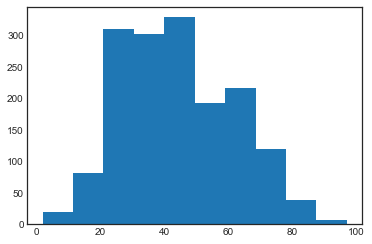

In [10]:
plt.style.use('seaborn-white')

plt.hist(df['Age'])

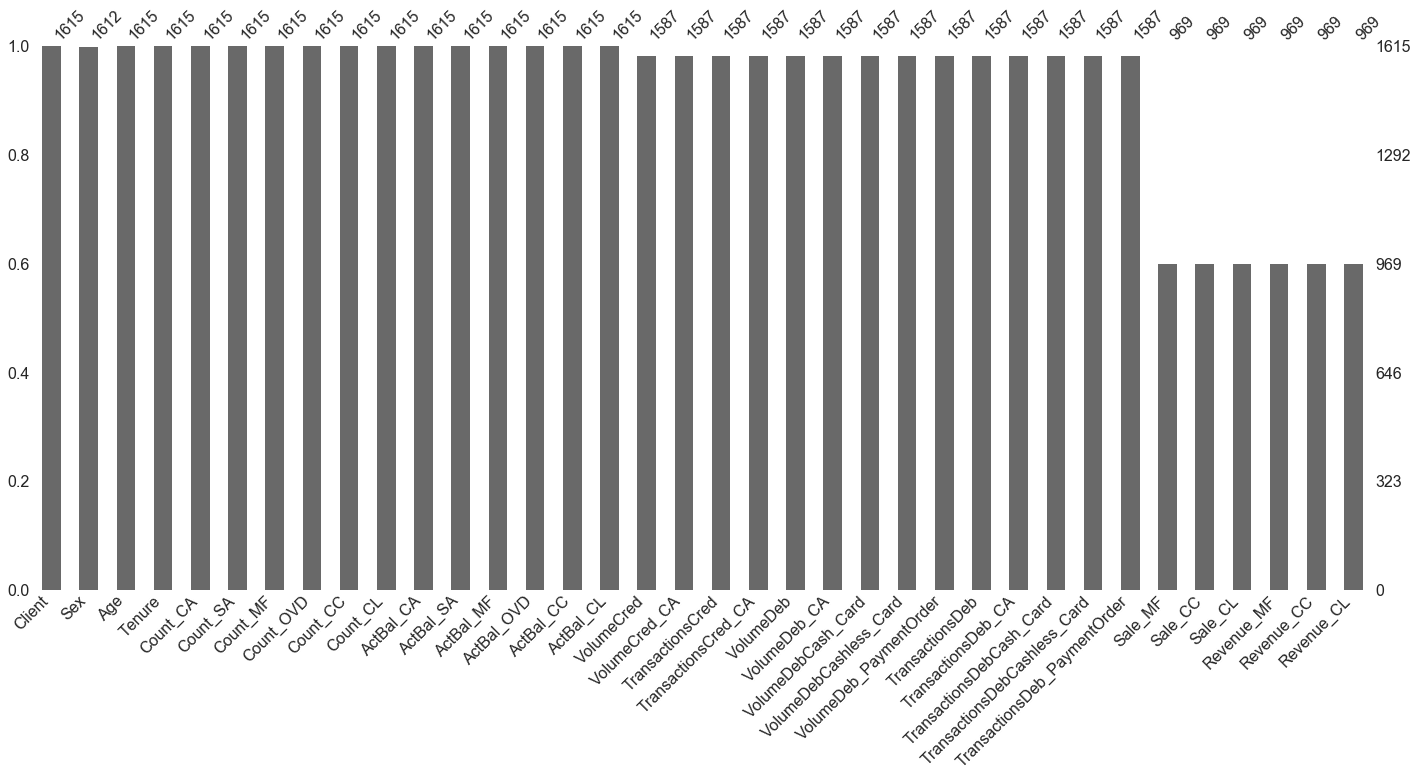

In [11]:
import missingno as mn
mn.bar(df)

In [12]:
print(df["Sex"].value_counts())
df["Sex"] = df["Sex"].apply(lambda x: '1' if x == 'M' else '0')
df["Sex"] = df["Sex"].astype(int)
df["Sex"].value_counts()
df["Sex"]

M    856
F    756
Name: Sex, dtype: int64


0       1
1       1
2       0
3       1
4       1
       ..
1610    1
1611    1
1612    1
1613    0
1614    1
Name: Sex, Length: 1615, dtype: int32

In [13]:
df['VolumeCred'] = df['VolumeCred'].fillna(0)
df['VolumeCred_CA'] = df['VolumeCred_CA'].fillna(0)
df['TransactionsCred'] = df['TransactionsCred'].fillna(0)
df['TransactionsCred_CA'] = df['TransactionsCred_CA'].fillna(0)
df['VolumeDeb'] = df['VolumeDeb'].fillna(0)
df['VolumeDeb_CA'] = df['VolumeDeb_CA'].fillna(0)
df['VolumeDebCash_Card'] = df['VolumeDebCash_Card'].fillna(0)
df['VolumeDebCashless_Card'] = df['VolumeDebCashless_Card'].fillna(0)
df['VolumeDeb_PaymentOrder'] = df['VolumeDeb_PaymentOrder'].fillna(0)
df['TransactionsDeb'] = df['TransactionsDeb'].fillna(0)
df['TransactionsDeb_CA'] = df['TransactionsDeb_CA'].fillna(0)
df['TransactionsDebCash_Card'] = df['TransactionsDebCash_Card'].fillna(0)
df['TransactionsDebCashless_Card'] = df['TransactionsDebCashless_Card'].fillna(0)
df['TransactionsDeb_PaymentOrder'] = df['TransactionsDeb_PaymentOrder'].fillna(0)

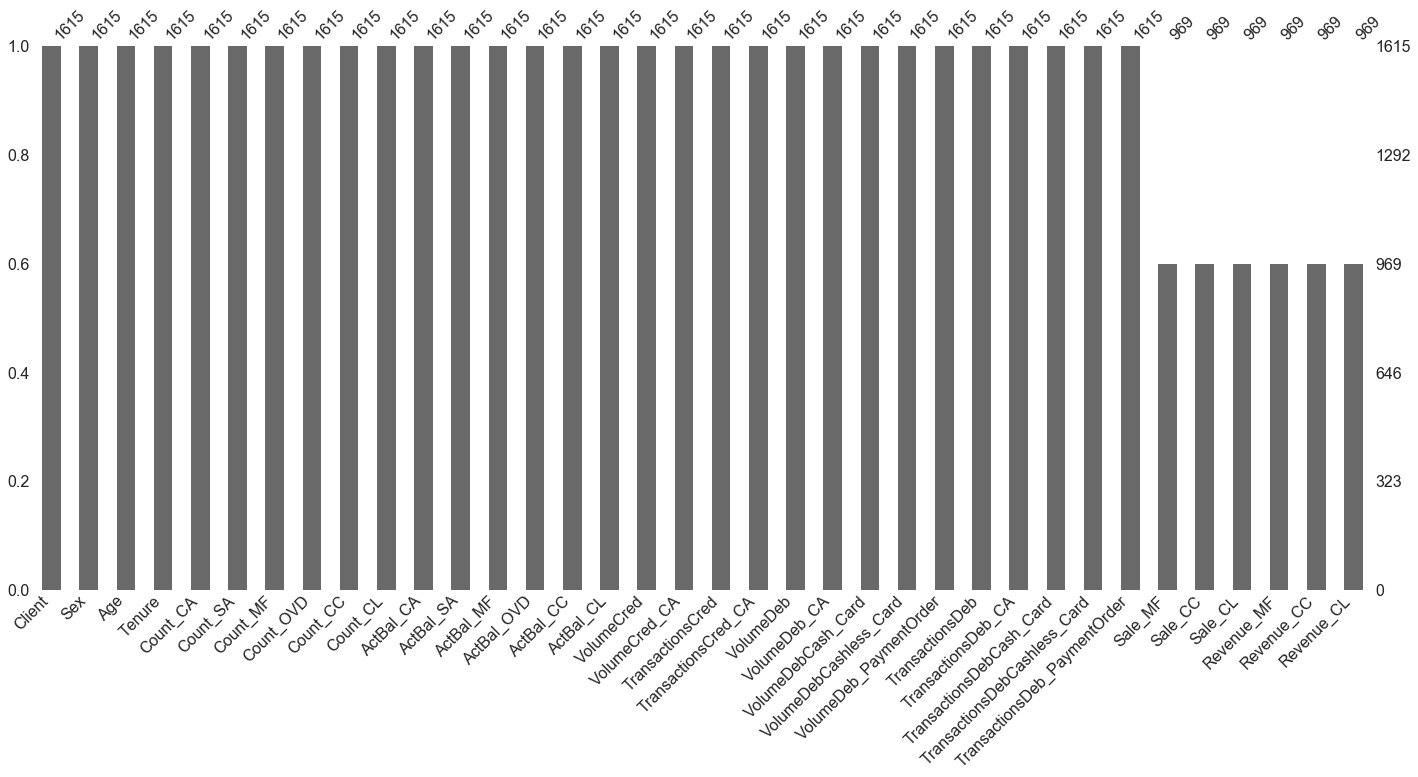

In [14]:
mn.bar(df)

In [277]:
#The Overall Dataset Created after merging different tables and imputing missing values
df.to_csv("Overall_Dataset.csv")

In [15]:
df[df.columns[1:]].corr()['Sale_CL'][:].sort_values(ascending=False)

Sale_CL                         1.000000
Revenue_CL                      0.712570
Tenure                          0.177345
TransactionsCred_CA             0.092394
TransactionsCred                0.090906
Count_CA                        0.084619
TransactionsDebCash_Card        0.082213
TransactionsDeb                 0.077161
ActBal_MF                       0.074075
TransactionsDeb_CA              0.074017
ActBal_OVD                      0.067968
VolumeDeb                       0.064772
TransactionsDeb_PaymentOrder    0.057079
Count_CL                        0.054304
VolumeDeb_PaymentOrder          0.053348
ActBal_CL                       0.052295
Count_MF                        0.045515
VolumeDeb_CA                    0.042784
VolumeDebCashless_Card          0.041211
Count_OVD                       0.040541
Count_SA                        0.036352
TransactionsDebCashless_Card    0.020377
VolumeDebCash_Card              0.018157
Revenue_MF                      0.015414
VolumeCred      

In [16]:
df[df.columns[1:]].corr()['Sale_MF'][:].sort_values(ascending=False)

Sale_MF                         1.000000
Revenue_MF                      0.388389
Count_MF                        0.164993
TransactionsDebCashless_Card    0.129922
TransactionsDeb                 0.090371
TransactionsCred_CA             0.088573
TransactionsCred                0.081160
TransactionsDeb_CA              0.062577
Sex                             0.048806
TransactionsDeb_PaymentOrder    0.030198
ActBal_MF                       0.026076
VolumeCred_CA                   0.018487
ActBal_CC                       0.012711
Revenue_CL                      0.006943
VolumeDebCashless_Card          0.005859
TransactionsDebCash_Card        0.005351
Count_CA                        0.003675
Count_CC                        0.000740
ActBal_OVD                      0.000470
VolumeCred                     -0.000598
Count_SA                       -0.001527
Count_OVD                      -0.005856
Tenure                         -0.006277
Sale_CL                        -0.009934
VolumeDeb_Paymen

In [17]:
df[df.columns[1:]].corr()['Sale_CC'][:].sort_values(ascending=False)

Sale_CC                         1.000000
Revenue_CC                      0.265885
ActBal_SA                       0.176878
ActBal_CA                       0.166340
Count_SA                        0.106517
VolumeDeb_PaymentOrder          0.077699
TransactionsDebCash_Card        0.065856
Revenue_CL                      0.057624
VolumeDeb                       0.054899
Age                             0.050695
VolumeDeb_CA                    0.047927
Count_OVD                       0.045248
TransactionsCred                0.032055
Tenure                          0.017929
VolumeCred                      0.014716
TransactionsCred_CA             0.006586
TransactionsDeb                -0.001601
Revenue_MF                     -0.001846
VolumeCred_CA                  -0.002930
Sex                            -0.007726
VolumeDebCash_Card             -0.009669
Count_CC                       -0.011060
TransactionsDeb_CA             -0.011107
TransactionsDeb_PaymentOrder   -0.011693
VolumeDebCashles

In [18]:
#1.Removing Revenue Features as we are predicting the Sale Propensity.
#2.Removing features VolumeCred','VolumeDeb','TransactionsDeb','TransactionsCred, they show high correlation with other features.

sales_df = df
sales_df = sales_df.drop(['Revenue_MF','Revenue_CC','Revenue_CL','VolumeCred','VolumeDeb','TransactionsDeb','TransactionsCred'], axis=1)

In [19]:
train = sales_df[~sales_df['Sale_CL'].isna()]
train = train.reset_index(drop=True)
test = sales_df[sales_df['Sale_CL'].isna()]
test = test.reset_index(drop=True)
test_bkp = test

In [278]:
#Training Data and Target Data
train.to_csv("Training_Data_For_Propensity.csv")
test.to_csv("Target_Data_For_Propensity.csv")

In [20]:
train.describe()

Client         Sex         Age      Tenure    Count_CA  \
count   969.000000  969.000000  969.000000  969.000000  969.000000   
mean    814.781218    0.531476   44.195046  100.393189    1.075335   
std     464.568139    0.499266   17.211799   65.437097    0.323815   
min       1.000000    0.000000    2.000000    0.000000    1.000000   
25%     422.000000    0.000000   30.000000   42.000000    1.000000   
50%     819.000000    1.000000   41.000000   95.000000    1.000000   
75%    1216.000000    1.000000   57.000000  151.000000    1.000000   
max    1615.000000    1.000000   90.000000  271.000000    4.000000   

         Count_SA    Count_MF   Count_OVD    Count_CC    Count_CL  ...  \
count  969.000000  969.000000  969.000000  969.000000  969.000000  ...   
mean     0.323013    0.983488    0.259030    0.113519    0.090815  ...   
std      0.578450    4.547015    0.438328    0.317390    0.318195  ...   
min      0.000000    0.000000    0.000000    0.000000    0.000000  ...   
25%      0.000000    0.000000    0.000000    0.000000    0.000000  ...   
50%      0.000000    0.000000    0.000000    0.000000    0.000000  ...   
75%      1.000000    0.000000    1.000000    0.000000    0.000000  ...   
max      3.000000   79.000000    1.000000    1.000000    2.000000  ...   

       VolumeDebCash_Card  VolumeDebCashless_Card  VolumeDeb_PaymentOrder  \
count          969.000000              969.000000              969.000000   
mean           265.861413              154.800184              705.984050   
std            866.245556              330.898970             3070.520579   
min              0.000000                0.000000                0.000000   
25%              0.000000                0.000000                0.000000   
50%             74.281429               23.820357              171.964286   
75%            353.571429              181.307143              483.178571   
max          23571.428571             3637.616786            61955.103929   

       TransactionsDeb_CA  TransactionsDebCash_Card  \
count          969.000000                969.000000   
mean            13.564499                  1.981424   
std             13.016210                  2.698267   
min              0.000000                  0.000000   
25%              4.000000                  0.000000   
50%             10.000000                  1.000000   
75%             19.000000                  3.000000   
max             83.000000                 25.000000   

       TransactionsDebCashless_Card  TransactionsDeb_PaymentOrder     Sale_MF  \
count                    969.000000                    969.000000  969.000000   
mean                       5.261094                      4.543860    0.199174   
std                        8.329906                      5.225334    0.399586   
min                        0.000000                      0.000000    0.000000   
25%                        0.000000                      0.000000    0.000000   
50%                        1.000000                      3.000000    0.000000   
75%                        7.000000                      7.000000    0.000000   
max                       60.000000                     34.000000    1.000000   

          Sale_CC     Sale_CL  
count  969.000000  969.000000  
mean     0.249742    0.299278  
std      0.433087    0.458178  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    0.000000  
75%      0.000000    1.000000  
max      1.000000    1.000000  

[8 rows x 29 columns]

In [21]:
#As seen above in train.describe() the features are not scaled properly so they are to be standardize
from sklearn import preprocessing
columns = ['VolumeCred_CA','VolumeDeb_CA', 'VolumeDebCash_Card', 'VolumeDebCashless_Card','VolumeDeb_PaymentOrder', 'ActBal_CA', 'ActBal_SA','ActBal_MF', 'ActBal_OVD', 'ActBal_CC', 'ActBal_CL']

for variable in columns:
    train[variable] = preprocessing.scale(train[variable])

In [22]:
from sklearn import preprocessing
#As seen above in test.describe() the features are not scaled properly so they are to be standardize
columns = ['VolumeCred_CA','VolumeDeb_CA', 'VolumeDebCash_Card', 'VolumeDebCashless_Card','VolumeDeb_PaymentOrder', 'ActBal_CA', 'ActBal_SA','ActBal_MF', 'ActBal_OVD', 'ActBal_CC', 'ActBal_CL']

for variable in columns:
    test[variable] = preprocessing.scale(test[variable])

In [23]:
test_data = test
test_data = test_data.drop(['Sale_CL', 'Sale_MF', 'Sale_CC'], axis=1)

In [24]:
null_columns=train.columns[train.isnull().any()]
train[null_columns].isnull().sum()

Series([], dtype: float64)

In [218]:
test_data.shape

(646, 35)

# Feature Selection

In [25]:
################################### Consumer Loan ###########################################
# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

train_select_features = train
train_select_features = train_select_features.drop(['Sale_MF','Sale_CC'], axis = 1)
print(train_select_features.shape)
array = train.values
X_select_feature_cl = array[:,0:27]
Y_select_feature_cl = array[:,27]
Y_select_feature_cl=Y_select_feature_cl.astype('int')

# Feature Selection
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 20)
fit = rfe.fit(X_select_feature_cl, Y_select_feature_cl)
print("Num Features Consumer Loan: %d" % fit.n_features_)
print("Selected Features for Consumer Loan: %s" % fit.support_)
print("Feature Ranking Consumer Loan: %s" % fit.ranking_)


################################### Mutual Fund ###########################################

# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

train_select_features = train
train_select_features = train_select_features.drop(['Sale_CL','Sale_CC'], axis = 1)
print(train_select_features.shape)
array = train.values
X_select_feature_mf = array[:,0:27]
Y_select_feature_mf = array[:,27]
Y_select_feature_mf=Y_select_feature_mf.astype('int')

# Feature Selection
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 20)
fit = rfe.fit(X_select_feature_mf, Y_select_feature_mf)
print("Num Features Mutual Fund: %d" % fit.n_features_)
print("Selected Features for Mutual Fund: %s" % fit.support_)
print("Feature Ranking Mutual Fund: %s" % fit.ranking_)

################################### Credit Card ###########################################
# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

train_select_features = train
train_select_features = train_select_features.drop(['Sale_CL','Sale_MF'], axis = 1)
print(train_select_features.shape)
array = train.values
X_select_feature_cc = array[:,0:27]
Y_select_feature_cc = array[:,27]
Y_select_feature_cc=Y_select_feature_cc.astype('int')

# Feature Selection
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 20)
fit = rfe.fit(X_select_feature_cc, Y_select_feature_cc)
print("Num Features Credit Card: %d" % fit.n_features_)
print("Selected Features Credit Card: %s" % fit.support_)
print("Feature Ranking Credit Card: %s" % fit.ranking_)

(969, 27)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

Num Features Customer Loan: 20
Selected Features for Customer Loan: [False False False False  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True  True False  True
  True False  True]
Feature Ranking Customer Loan: [8 5 4 7 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 6 1 1 2 1]
(969, 27)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

Num Features Mutual Fund: 20
Selected Features for Mutual Fund: [False False False False  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True  True False  True
  True False  True]
Feature Ranking Mutual Fund: [8 5 4 7 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 6 1 1 2 1]
(969, 27)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

Num Features Credit Card: 20
Selected Features Credit Card: [False False False False  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True  True False  True
  True False  True]
Feature Ranking Credit Card: [8 5 4 7 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 6 1 1 2 1]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [26]:
train[train.columns[1:]].corr()['Sale_CL'][:].sort_values(ascending=False)

Sale_CL                         1.000000
Tenure                          0.177345
TransactionsCred_CA             0.092394
Count_CA                        0.084619
TransactionsDebCash_Card        0.082213
ActBal_MF                       0.074075
TransactionsDeb_CA              0.074017
ActBal_OVD                      0.067968
TransactionsDeb_PaymentOrder    0.057079
Count_CL                        0.054304
VolumeDeb_PaymentOrder          0.053348
ActBal_CL                       0.052295
Count_MF                        0.045515
VolumeDeb_CA                    0.042784
VolumeDebCashless_Card          0.041211
Count_OVD                       0.040541
Count_SA                        0.036352
TransactionsDebCashless_Card    0.020377
VolumeDebCash_Card              0.018157
VolumeCred_CA                  -0.003945
Sale_MF                        -0.009934
Count_CC                       -0.013643
Sale_CC                        -0.017832
Sex                            -0.032190
ActBal_SA       

In [27]:
train[train.columns[1:]].corr()['Sale_MF'][:].sort_values(ascending=False)

Sale_MF                         1.000000
Count_MF                        0.164993
TransactionsDebCashless_Card    0.129922
TransactionsCred_CA             0.088573
TransactionsDeb_CA              0.062577
Sex                             0.048806
TransactionsDeb_PaymentOrder    0.030198
ActBal_MF                       0.026076
VolumeCred_CA                   0.018487
ActBal_CC                       0.012711
VolumeDebCashless_Card          0.005859
TransactionsDebCash_Card        0.005351
Count_CA                        0.003675
Count_CC                        0.000740
ActBal_OVD                      0.000470
Count_SA                       -0.001527
Count_OVD                      -0.005856
Tenure                         -0.006277
Sale_CL                        -0.009934
VolumeDeb_PaymentOrder         -0.010645
Sale_CC                        -0.019104
VolumeDebCash_Card             -0.027537
VolumeDeb_CA                   -0.029355
ActBal_SA                      -0.036163
ActBal_CA       

Finding the correlation between the Target variable and other Features

In [28]:
train[train.columns[1:]].corr()['Sale_CC'][:].sort_values(ascending=False)

Sale_CC                         1.000000
ActBal_SA                       0.176878
ActBal_CA                       0.166340
Count_SA                        0.106517
VolumeDeb_PaymentOrder          0.077699
TransactionsDebCash_Card        0.065856
Age                             0.050695
VolumeDeb_CA                    0.047927
Count_OVD                       0.045248
Tenure                          0.017929
TransactionsCred_CA             0.006586
VolumeCred_CA                  -0.002930
Sex                            -0.007726
VolumeDebCash_Card             -0.009669
Count_CC                       -0.011060
TransactionsDeb_CA             -0.011107
TransactionsDeb_PaymentOrder   -0.011693
VolumeDebCashless_Card         -0.013792
Sale_CL                        -0.017832
Sale_MF                        -0.019104
ActBal_OVD                     -0.024696
ActBal_CC                      -0.025465
ActBal_MF                      -0.027145
Count_MF                       -0.027281
Count_CA        

In [29]:
important_features_cl = ['Tenure', 'Sex','Count_CA', 'TransactionsCred_CA', 'TransactionsDebCash_Card', 'ActBal_MF', 'ActBal_OVD', 'TransactionsDeb_CA', 'Count_CL', 'ActBal_CL', 'VolumeDeb_PaymentOrder', 'TransactionsDeb_PaymentOrder', 'Count_MF', 'Count_OVD', 'VolumeDeb_CA', 'VolumeDebCashless_Card', 'Count_SA', 'VolumeDebCash_Card', 'TransactionsDebCashless_Card','Age']
important_features_mf = ['Tenure', 'Count_CA', 'TransactionsCred_CA', 'TransactionsDebCash_Card', 'ActBal_MF', 'ActBal_OVD', 'TransactionsDeb_CA', 'Count_CL', 'ActBal_CL', 'VolumeDeb_PaymentOrder', 'TransactionsDeb_PaymentOrder', 'Count_MF', 'Count_OVD', 'VolumeDeb_CA', 'VolumeDebCashless_Card', 'Count_SA', 'VolumeDebCash_Card', 'TransactionsDebCashless_Card','Age', 'Sex']
important_features_cc = ['Tenure', 'Count_CA', 'TransactionsCred_CA', 'TransactionsDebCash_Card', 'ActBal_MF', 'ActBal_OVD', 'TransactionsDeb_CA', 'Count_CL', 'ActBal_CL', 'VolumeDeb_PaymentOrder', 'TransactionsDeb_PaymentOrder', 'Count_MF', 'Count_OVD', 'VolumeDeb_CA', 'VolumeDebCashless_Card', 'Count_SA', 'VolumeDebCash_Card', 'TransactionsDebCashless_Card','Age','ActBal_SA','Sex']
X_cl = train[important_features_cl]
X_mf = train[important_features_mf]
X_cc = train[important_features_cc]
y_cl, y_cc, y_mf = train['Sale_CL'],train['Sale_CC'],train['Sale_MF']

In [30]:
from sklearn.model_selection import train_test_split
X_train_cl, X_val_cl, y_train_cl, y_val_cl = train_test_split(X_cl,y_cl, test_size=0.15, random_state=42)
X_train_cc, X_val_cc, y_train_cc, y_val_cc = train_test_split(X_cc,y_cc, test_size=0.15, random_state=42)
X_train_mf, X_val_mf, y_train_mf, y_val_mf = train_test_split(X_mf,y_mf, test_size=0.15, random_state=42)

In [31]:
X_test_cl = test[important_features_cl]
X_test_mf = test[important_features_mf]
X_test_cc = test[important_features_cc]

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Consumer Loan : Classification Models

In [33]:
logr = LogisticRegression(random_state=0)
logr.fit(X_train_cl,y_train_cl)

y_pred_cl = logr.predict(X_val_cl)
print('accuracy is',accuracy_score(y_val_cl, y_pred_cl))
print(classification_report(y_val_cl, y_pred_cl))
print(confusion_matrix(y_val_cl, y_pred_cl))
print(logr.score(X_val_cl,y_val_cl))

accuracy is 0.7191780821917808
              precision    recall  f1-score   support

         0.0       0.74      0.93      0.83       105
         1.0       0.50      0.17      0.25        41

    accuracy                           0.72       146
   macro avg       0.62      0.55      0.54       146
weighted avg       0.67      0.72      0.67       146

[[98  7]
 [34  7]]
0.7191780821917808


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [34]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_jobs=2, random_state=0)

clf.fit(X_train_cl,y_train_cl)

y_pred_cl = clf.predict(X_val_cl)

# Summary of the predictions made by the classifier
print(classification_report(y_val_cl, y_pred_cl))
print(confusion_matrix(y_val_cl, y_pred_cl))
print(clf.score(X_val_cl,y_val_cl))
# Accuracy score

print('accuracy is',accuracy_score(y_val_cl, y_pred_cl))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

         0.0       0.71      0.90      0.79       105
         1.0       0.21      0.07      0.11        41

    accuracy                           0.66       146
   macro avg       0.46      0.48      0.45       146
weighted avg       0.57      0.66      0.60       146

[[94 11]
 [38  3]]
0.6643835616438356
accuracy is 0.6643835616438356


In [35]:
# Gradient Bossting Tree's
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=0.1, max_features=2, max_depth=2, random_state=0)
gb_clf.fit(X_train_cl,y_train_cl)

#clf.fit(X_train, y_train)

y_pred_cl = gb_clf.predict(X_val_cl)

print(classification_report(y_val_cl, y_pred_cl))
print(confusion_matrix(y_val_cl, y_pred_cl))
print(gb_clf.score(X_val_cl,y_val_cl))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_val_cl, y_pred_cl))

              precision    recall  f1-score   support

         0.0       0.72      1.00      0.84       105
         1.0       1.00      0.02      0.05        41

    accuracy                           0.73       146
   macro avg       0.86      0.51      0.44       146
weighted avg       0.80      0.73      0.62       146

[[105   0]
 [ 40   1]]
0.726027397260274
accuracy is 0.726027397260274


In [219]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier
import numpy as np
import warnings

warnings.simplefilter('ignore')

clf1 = XGBClassifier()
clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.1, max_features=2, max_depth=2, random_state=0)
lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2], 
                          meta_classifier=lr)

print('3-fold cross validation:\n')

for clf, label in zip([clf1, clf2, sclf], 
                      ['XGBoost', 
                       'GradientBoosting', 
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, X_train_cl, y_train_cl, 
                                              cv=3, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))



sclf.fit(X_train_cl,y_train_cl)

y_pred_cl = sclf.predict(X_val_cl)
print(classification_report(y_val_cl, y_pred_cl))
print(confusion_matrix(y_val_cl, y_pred_cl))
# Accuracy score
from sklearn.metrics import accuracy_score
print('STACKING Accuracy is',accuracy_score(y_val_cl, y_pred_cl))

report = classification_report(y_val_cl, y_pred_cl, output_dict=True)
df22 = pd.DataFrame(report).transpose()
print(" ")
print('Classification Report when predicting Consumer Loan using STACKING')
df22

3-fold cross validation:

Accuracy: 0.70 (+/- 0.02) [XGBoost]
Accuracy: 0.70 (+/- 0.00) [GradientBoosting]
Accuracy: 0.70 (+/- 0.02) [StackingClassifier]
              precision    recall  f1-score   support

         0.0       0.75      0.87      0.81       105
         1.0       0.44      0.27      0.33        41

    accuracy                           0.70       146
   macro avg       0.60      0.57      0.57       146
weighted avg       0.66      0.70      0.67       146

[[91 14]
 [30 11]]
STACKING Accuracy is 0.6986301369863014
 
Classification Report when predicting Customer Loan using STACKING


precision    recall  f1-score    support
0.0            0.752066  0.866667  0.805310  105.00000
1.0            0.440000  0.268293  0.333333   41.00000
accuracy       0.698630  0.698630  0.698630    0.69863
macro avg      0.596033  0.567480  0.569322  146.00000
weighted avg   0.664431  0.698630  0.672768  146.00000

In [38]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate
import pandas as pd
import numpy as np
import re

Using TensorFlow backend.


=> Propensity Model for Consumer Loan using Deep Learning

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_94 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_95 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_96 (Dense)             (None, 1)                 21        
Total params: 861
Trainable params: 861
Non-trainable params: 0
_________________________________________________________________
None
Test Loss: 0.5698075690498091
Test Accuracy: 0.7191780805587769


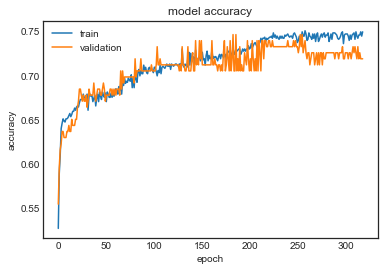

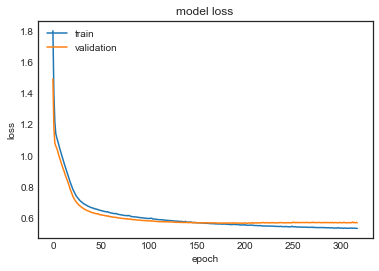

Classification Report when predicting Customer Loan using Deep Learning


precision    recall  f1-score     support
0.0            0.735294  0.952381  0.829876  105.000000
1.0            0.500000  0.121951  0.196078   41.000000
accuracy       0.719178  0.719178  0.719178    0.719178
macro avg      0.617647  0.537166  0.512977  146.000000
weighted avg   0.669218  0.719178  0.651891  146.000000

In [148]:
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.optimizers import Adam
model_cl = Sequential()
#input2 = Input(shape=(20,))
model_cl.add(Dense(20,activation='relu', input_shape=(20,)))
model_cl.add(Dense(20, activation='relu'))
model_cl.add(Dense(1, activation='sigmoid'))

model_cl.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

print(model_cl.summary())

history_cl = model_cl.fit(X_train_cl, y_train_cl, batch_size=64, epochs=10000, verbose=False, validation_data=(X_val_cl, y_val_cl),callbacks=[EarlyStopping(monitor='val_loss', patience=120, min_delta=0.00001)])

score_cl = model_cl.evaluate(X_val_cl, y_val_cl, verbose=False)

print("Test Loss:", score_cl[0])
print("Test Accuracy:", score_cl[1])


import matplotlib.pyplot as plt

plt.plot(history_cl.history['accuracy'])
plt.plot(history_cl.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')
plt.show()

plt.plot(history_cl.history['loss'])
plt.plot(history_cl.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')
plt.show()


classes = model_cl.predict_classes(X_val_cl)
d_cl = pd.DataFrame(classes)
d_cl = d_cl.rename(columns={0: "Predicted"})

report = classification_report(y_val_cl, d_cl['Predicted'], output_dict=True)
df22 = pd.DataFrame(report).transpose()
print('Classification Report when predicting Consumer Loan using Deep Learning')
df22    

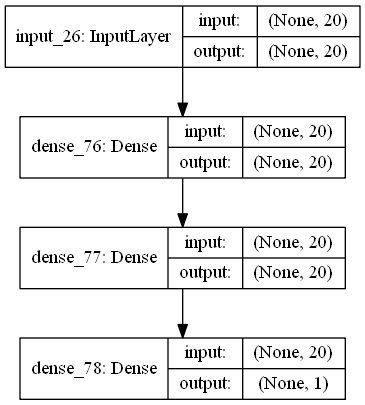

In [317]:
from keras.utils import plot_model
plot_model(model_cl, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Text(0.5, 194.08, 'Predicted label')

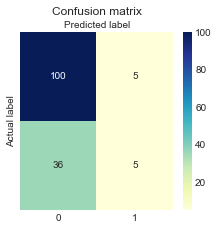

In [200]:
classes = model_cl.predict_classes(X_val_cl)
d_cl = pd.DataFrame(classes)
d_cl = d_cl.rename(columns={0: "Predicted"})

class_names=[0,1] # name of classes
fig, ax = plt.subplots(figsize=(3,3))
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_val_cl, d_cl['Predicted'])), annot=True, xticklabels=1, yticklabels=False, cmap = "YlGnBu",fmt='g' )
ax.xaxis.set_label_position("top")
ax.xaxis.set_ticklabels(class_names)
ax.yaxis.set_ticklabels(class_names)
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [152]:
y_test_cl = model_cl.predict(X_test_cl)
print(type(y_test_cl))
d = pd.DataFrame(y_test_cl)
d = d.rename(columns={0: "Predicted_Sale_CL"})

<class 'numpy.ndarray'>


In [133]:
test_data['Predicted_Sale_CL'] = d['Predicted_Sale_CL']

Mutual Fund: Classification Models

In [209]:
#Logistic Regression 
logr_mf = LogisticRegression(random_state=0)
logr_mf.fit(X_train_mf,y_train_mf)

y_pred_mf = logr_mf.predict(X_val_mf)
print('Logistic Regression Accuracy is',accuracy_score(y_val_mf, y_pred_mf))

Logistic Regression Accuracy is 0.7602739726027398


In [208]:
# Gradient Bossting Tree's
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=0.1, max_features=2, max_depth=2, random_state=0)
gb_clf.fit(X_train_mf,y_train_mf)

#clf.fit(X_train, y_train)

y_pred_mf = gb_clf.predict(X_val_mf)

print(" ")
print(classification_report(y_val_mf, y_pred_mf))
print(confusion_matrix(y_val_mf, y_pred_mf))
# Accuracy score
from sklearn.metrics import accuracy_score
print(" ")
print('Gradient Boosting Accuracy is',accuracy_score(y_val_mf, y_pred_mf))

 
              precision    recall  f1-score   support

         0.0       0.74      1.00      0.85       108
         1.0       1.00      0.03      0.05        38

    accuracy                           0.75       146
   macro avg       0.87      0.51      0.45       146
weighted avg       0.81      0.75      0.64       146

[[108   0]
 [ 37   1]]
 
Gradient Boosting Accuracy is 0.7465753424657534


In [223]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier
import numpy as np
import warnings

warnings.simplefilter('ignore')

clf1 = XGBClassifier()
clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.1, max_features=2, max_depth=2, random_state=0)
#clf3 = GaussianNB()
lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2], 
                          meta_classifier=lr)

print('3-fold cross validation:\n')

for clf, label in zip([clf1, clf2, sclf], 
                      ['XGBoost', 
                       'Gradient Boost', 
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, X_train_mf, y_train_mf, 
                                              cv=3, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

sclf.fit(X_train_mf,y_train_mf)

y_pred_mf = sclf.predict(X_val_mf)
print(classification_report(y_val_mf, y_pred_mf))
print(confusion_matrix(y_val_mf, y_pred_mf))
# Accuracy score
from sklearn.metrics import accuracy_score
print(" ")
print('STACKING Accuracy is',accuracy_score(y_val_mf, y_pred_mf))



3-fold cross validation:

Accuracy: 0.80 (+/- 0.01) [XGBoost]
Accuracy: 0.81 (+/- 0.00) [Gradient Boost]
Accuracy: 0.80 (+/- 0.01) [StackingClassifier]
              precision    recall  f1-score   support

         0.0       0.75      0.99      0.86       108
         1.0       0.75      0.08      0.14        38

    accuracy                           0.75       146
   macro avg       0.75      0.53      0.50       146
weighted avg       0.75      0.75      0.67       146

[[107   1]
 [ 35   3]]
 
STACKING Accuracy is 0.7534246575342466


=> Propensity Model for Mutual Fund using Deep Learning

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_100 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_101 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_102 (Dense)            (None, 1)                 21        
Total params: 861
Trainable params: 861
Non-trainable params: 0
_________________________________________________________________
None
Test Loss: 0.595126070388376
Test Accuracy: 0.7465753555297852


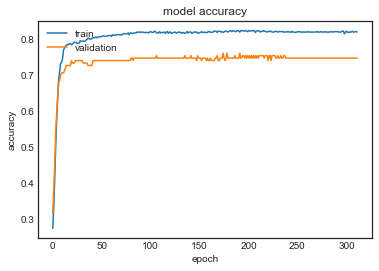

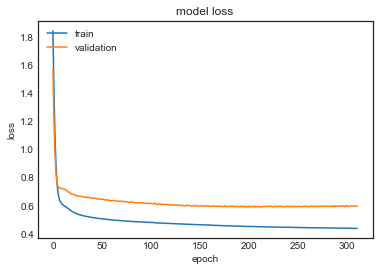

Classification Report when predicting Mutual Fund using Deep Learning


precision    recall  f1-score     support
0.0            0.751773  0.981481  0.851406  108.000000
1.0            0.600000  0.078947  0.139535   38.000000
accuracy       0.746575  0.746575  0.746575    0.746575
macro avg      0.675887  0.530214  0.495470  146.000000
weighted avg   0.712270  0.746575  0.666124  146.000000

In [150]:
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.optimizers import Adam
model_mf = Sequential()
#input2 = Input(shape=(20,))
model_mf.add(Dense(20,activation='relu', input_shape=(20,)))
model_mf.add(Dense(20, activation='relu'))
model_mf.add(Dense(1, activation='sigmoid'))

model_mf.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

print(model_mf.summary())

history_mf = model_mf.fit(X_train_mf, y_train_mf, batch_size=64, epochs=10000, verbose=False, validation_data=(X_val_mf, y_val_mf),callbacks=[EarlyStopping(monitor='val_loss', patience=120, min_delta=0.00001)])

score_mf = model_mf.evaluate(X_val_mf, y_val_mf, verbose=False)

print("Test Loss:", score_mf[0])
print("Test Accuracy:", score_mf[1])


import matplotlib.pyplot as plt

plt.plot(history_mf.history['accuracy'])
plt.plot(history_mf.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')
plt.show()

plt.plot(history_mf.history['loss'])
plt.plot(history_mf.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')
plt.show()


classes = model_mf.predict_classes(X_val_mf)
d_mf = pd.DataFrame(classes)
d_mf = d_mf.rename(columns={0: "Predicted"})

report = classification_report(y_val_mf, d_mf['Predicted'], output_dict=True)
df22 = pd.DataFrame(report).transpose()
print('Classification Report when predicting Mutual Fund using Deep Learning')
df22    

Text(0.5, 194.08, 'Predicted label')

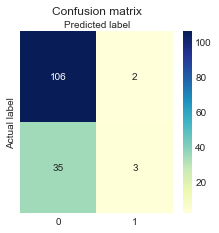

In [201]:
classes = model_mf.predict_classes(X_val_mf)
d_mf = pd.DataFrame(classes)
d_mf = d_mf.rename(columns={0: "Predicted"})

class_names=[0,1] # name of classes
fig, ax = plt.subplots(figsize=(3,3))
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_val_mf, d_mf['Predicted'])), annot=True, xticklabels=1, yticklabels=False, cmap = "YlGnBu",fmt='g' )
ax.xaxis.set_label_position("top")
ax.xaxis.set_ticklabels(class_names)
ax.yaxis.set_ticklabels(class_names)
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [151]:
y_test_mf = model_mf.predict(X_test_mf)
print(type(y_test_mf))
d = pd.DataFrame(y_test_mf)
d = d.rename(columns={0: "Predicted_Sale_MF"})
test_data['Predicted_Sale_MF'] = d['Predicted_Sale_MF']

<class 'numpy.ndarray'>


Credit Card : Classification Models

In [81]:
logr_cc = LogisticRegression(random_state=0)
logr_cc.fit(X_train_cc,y_train_cc)

y_pred_cc = logr_cc.predict(X_val_cc)
print('accuracy is',accuracy_score(y_val_cc, y_pred_cc))

accuracy is 0.7534246575342466


In [82]:
# Gradient Bossting Tree's
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=0.1, max_features=2, max_depth=2, random_state=0)
gb_clf.fit(X_train_cc,y_train_cc)

#clf.fit(X_train, y_train)

y_pred_cc = gb_clf.predict(X_val_cc)

print(classification_report(y_val_cc, y_pred_cc))
print(confusion_matrix(y_val_cc, y_pred_cc))
print(gb_clf.score(X_val_cc,y_val_cc))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_val_cc, y_pred_cc))

              precision    recall  f1-score   support

         0.0       0.76      1.00      0.86       111
         1.0       0.00      0.00      0.00        35

    accuracy                           0.76       146
   macro avg       0.38      0.50      0.43       146
weighted avg       0.58      0.76      0.66       146

[[111   0]
 [ 35   0]]
0.7602739726027398
accuracy is 0.7602739726027398


In [222]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier
import numpy as np
import warnings

warnings.simplefilter('ignore')

clf1 = XGBClassifier()
clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.1, max_features=2, max_depth=2, random_state=0)
#clf3 = GaussianNB()
lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2], 
                          meta_classifier=lr)

print('3-fold cross validation:\n')

for clf, label in zip([clf1, clf2, sclf], 
                      ['XG', 
                       'Gradient Boost', 
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, X_train_cc, y_train_cc, 
                                              cv=3, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))
    
    
sclf.fit(X_train_cc,y_train_cc)

y_pred_cc = sclf.predict(X_val_cc)
print(classification_report(y_val_cc, y_pred_cc))
print(confusion_matrix(y_val_cc, y_pred_cc))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_val_cc, y_pred_cc))


3-fold cross validation:

Accuracy: 0.75 (+/- 0.01) [XG]
Accuracy: 0.75 (+/- 0.00) [Gradient Boost]
Accuracy: 0.75 (+/- 0.01) [StackingClassifier]
              precision    recall  f1-score   support

         0.0       0.78      0.97      0.86       111
         1.0       0.57      0.11      0.19        35

    accuracy                           0.77       146
   macro avg       0.67      0.54      0.53       146
weighted avg       0.73      0.77      0.70       146

[[108   3]
 [ 31   4]]
accuracy is 0.7671232876712328


=> Propensity Model for Credit Card using Deep Learning

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_70 (Dense)             (None, 20)                440       
_________________________________________________________________
dense_71 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_72 (Dense)             (None, 1)                 21        
Total params: 881
Trainable params: 881
Non-trainable params: 0
_________________________________________________________________
None
Test Loss: 0.5429224380075115
Test Accuracy: 0.7397260069847107


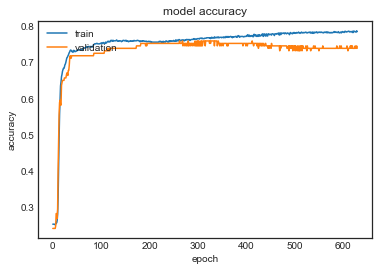

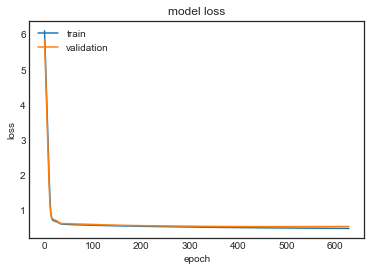

Classification Report when predicting Mutual Fund using Deep Learning


precision    recall  f1-score     support
0.0            0.766423  0.945946  0.846774  111.000000
1.0            0.333333  0.085714  0.136364   35.000000
accuracy       0.739726  0.739726  0.739726    0.739726
macro avg      0.549878  0.515830  0.491569  146.000000
weighted avg   0.662600  0.739726  0.676470  146.000000

In [85]:
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.optimizers import Adam
model_cc = Sequential()
#input2 = Input(shape=(20,))
model_cc.add(Dense(20,activation='relu', input_shape=(21,)))
model_cc.add(Dense(20, activation='relu'))
model_cc.add(Dense(1, activation='sigmoid'))

model_cc.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

print(model_cc.summary())

history_cc = model_cc.fit(X_train_cc, y_train_cc, batch_size=64, epochs=10000, verbose=False, validation_data=(X_val_cc, y_val_cc),callbacks=[EarlyStopping(monitor='val_loss', patience=120, min_delta=0.00001)])

score_cc = model_cc.evaluate(X_val_cc, y_val_cc, verbose=False)

print("Test Loss:", score_cc[0])
print("Test Accuracy:", score_cc[1])


import matplotlib.pyplot as plt

plt.plot(history_cc.history['accuracy'])
plt.plot(history_cc.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')
plt.show()

plt.plot(history_cc.history['loss'])
plt.plot(history_cc.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')
plt.show()


classes = model_cc.predict_classes(X_val_cc)
d_cc = pd.DataFrame(classes)
d_cc = d_cc.rename(columns={0: "Predicted"})

report = classification_report(y_val_cc, d_cc['Predicted'], output_dict=True)
df22 = pd.DataFrame(report).transpose()
print('Classification Report when predicting Mutual Fund using Deep Learning')
df22    

Text(0.5, 194.08, 'Predicted label')

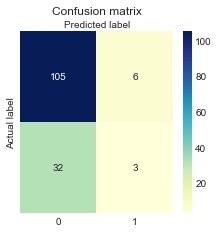

In [202]:
classes = model_cc.predict_classes(X_val_cc)
d_cc = pd.DataFrame(classes)
d_cc = d_cc.rename(columns={0: "Predicted"})

class_names=[0,1] # name of classes
fig, ax = plt.subplots(figsize=(3,3))
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_val_cc, d_cc['Predicted'])), annot=True, xticklabels=1, yticklabels=False, cmap = "YlGnBu",fmt='g' )
ax.xaxis.set_label_position("top")
ax.xaxis.set_ticklabels(class_names)
ax.yaxis.set_ticklabels(class_names)
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [86]:
y_test_cc = model_cc.predict(X_test_cc)
print(type(y_test_cc))
d = pd.DataFrame(y_test_cc)
d = d.rename(columns={0: "Predicted_Sale_CC"})
test_data['Predicted_Sale_CC'] = d['Predicted_Sale_CC']

<class 'numpy.ndarray'>


In [214]:
test_data.head(5)

Client  Sex   Age  Tenure  Count_CA  Count_SA  Count_MF  Count_OVD  \
0     909    1  21.0      27         1       0.0       0.0        1.0   
1     699    1  37.0     175         1       0.0       4.0        1.0   
2     528    0  19.0      70         1       0.0       0.0        1.0   
3    1145    1  61.0      45         1       0.0       0.0        0.0   
4     517    0  41.0      28         1       0.0       0.0        0.0   

   Count_CC  Count_CL  ...  TransactionsDeb_PaymentOrder  Predicted_Sale_CL  \
0       0.0       1.0  ...                           4.0           0.275419   
1       0.0       0.0  ...                           5.0           0.537396   
2       0.0       0.0  ...                           2.0           0.393233   
3       0.0       0.0  ...                           0.0           0.124883   
4       0.0       0.0  ...                           3.0           0.376567   

   Predicted_Sale_MF  Predicted_Sale_CC  Predicted_Revenue_CL  \
0           0.268561           0.230225             12.043067   
1           0.164073           0.149525             12.043067   
2           0.263026           0.283753             12.043067   
3           0.133930           0.354797             12.043067   
4           0.300592           0.351346             12.043067   

   Predicted_Revenue_MF  Predicted_Revenue_CC  Expected_Revenue_CL  \
0              9.664974             10.862516             3.316894   
1              9.664974             10.862516             6.471899   
2              9.664974             10.862516             4.735733   
3              9.664974             10.862516             1.503976   
4              9.664974             10.862516             4.535019   

   Expected_Revenue_MF  Expected_Revenue_CC  
0             2.595633             2.500827  
1             1.585761             1.624217  
2             2.542141             3.082274  
3             1.294427             3.853987  
4             2.905210             3.816500  

[5 rows x 35 columns]

# Regression Model: To Predict Revenues for Various Marketing Offers

In [87]:
df_corr = df
df_corr = df_corr.drop(['Sale_MF', 'Sale_CL','Sale_CC','Revenue_MF','Revenue_CC'], axis =1)
df_corr[df_corr.columns[1:]].corr()['Revenue_CL'][:].sort_values(ascending=False)

Revenue_CL                      1.000000
Tenure                          0.167014
ActBal_MF                       0.085097
Count_CA                        0.059230
VolumeDeb                       0.056543
VolumeDeb_PaymentOrder          0.056169
Count_CL                        0.055348
TransactionsCred                0.051528
Count_SA                        0.045696
ActBal_CL                       0.042403
TransactionsDebCash_Card        0.041668
VolumeDeb_CA                    0.040163
ActBal_OVD                      0.037555
TransactionsCred_CA             0.036115
Count_MF                        0.025940
ActBal_SA                       0.023288
TransactionsDeb                 0.023037
TransactionsDeb_CA              0.020615
Count_OVD                       0.016429
TransactionsDeb_PaymentOrder    0.012453
VolumeDebCash_Card              0.011394
VolumeDebCashless_Card          0.010896
VolumeCred                      0.010170
TransactionsDebCashless_Card   -0.019510
VolumeCred_CA   

In [88]:
df_corr = df
df_corr = df_corr.drop(['Sale_MF', 'Sale_CL','Sale_CC','Revenue_CC','Revenue_CL'], axis =1)
df_corr[df_corr.columns[1:]].corr()['Revenue_MF'][:].sort_values(ascending=False)

Revenue_MF                      1.000000
Count_OVD                       0.049337
Sex                             0.044636
VolumeCred_CA                   0.043596
Age                             0.038833
Count_MF                        0.037467
VolumeCred                      0.027277
TransactionsCred_CA             0.026941
TransactionsCred                0.025582
Count_SA                        0.013629
TransactionsDebCashless_Card    0.010704
Count_CC                        0.005592
ActBal_MF                       0.004617
ActBal_CA                       0.004011
Count_CA                        0.001831
TransactionsDeb                 0.000206
TransactionsDeb_PaymentOrder   -0.003617
Tenure                         -0.007787
VolumeDeb_PaymentOrder         -0.009977
ActBal_CC                      -0.011664
VolumeDeb_CA                   -0.014099
ActBal_OVD                     -0.014380
VolumeDeb                      -0.015401
TransactionsDeb_CA             -0.018049
VolumeDebCashles

In [89]:
df_corr = df
df_corr = df_corr.drop(['Sale_MF', 'Sale_CL','Sale_CC','Revenue_MF','Revenue_CL'], axis =1)
df_corr[df_corr.columns[1:]].corr()['Revenue_CC'][:].sort_values(ascending=False)

Revenue_CC                      1.000000
Count_OVD                       0.084483
VolumeDeb_PaymentOrder          0.050268
TransactionsDebCash_Card        0.038925
VolumeDeb                       0.029630
VolumeDeb_CA                    0.028797
TransactionsCred                0.028152
TransactionsDeb_CA              0.025686
VolumeCred_CA                   0.024459
TransactionsDeb_PaymentOrder    0.022651
Age                             0.022355
TransactionsDeb                 0.019457
VolumeCred                      0.018836
TransactionsCred_CA             0.018303
Count_SA                        0.011455
ActBal_CA                       0.009105
ActBal_CC                       0.007251
ActBal_SA                       0.004424
Tenure                          0.000168
Count_CC                       -0.002629
Count_MF                       -0.006240
TransactionsDebCashless_Card   -0.010827
VolumeDebCash_Card             -0.011033
ActBal_MF                      -0.011111
VolumeDebCashles

In [90]:
#Removing Revenue Features
sales_df = df
sales_df = sales_df.drop(['Sale_MF','Sale_CC','Sale_CL','VolumeCred','VolumeDeb','TransactionsDeb','TransactionsCred'], axis=1)

In [91]:
train_revenue = sales_df[~sales_df['Revenue_CL'].isna()]
train_revenue = train_revenue.reset_index(drop=True)
test_revenue = sales_df[sales_df['Revenue_CL'].isna()]
test_revenue = test_revenue.reset_index(drop=True)

In [92]:
#important_features = ['VolumeCred_CA','VolumeDeb_CA', 'TransactionsCred_CA', 'VolumeDebCash_Card', 'VolumeDebCashless_Card', 'VolumeDeb_PaymentOrder', 'TransactionsDeb_CA', 'TransactionsDebCash_Card', 'TransactionsDeb_PaymentOrder', 'Count_MF', 'ActBal_CA', 'ActBal_SA', 'ActBal_MF', 'Age', 'Tenure']
important_features_reg = ['Tenure' ,'Age', 'ActBal_MF' ,'Count_CA' ,'Count_CL','VolumeDeb_PaymentOrder' ,'Count_SA' ,'ActBal_CL' ,'VolumeDeb_CA' ,'ActBal_OVD' ,'TransactionsDebCash_Card' ,'TransactionsCred_CA' ,'Count_MF' ,'ActBal_SA' ,'Count_OVD' ,'TransactionsDeb_CA' ,'VolumeDebCash_Card','VolumeDebCashless_Card','TransactionsDeb_PaymentOrder']
X_reg = train_revenue[important_features_reg]
y_cl_reg, y_cc_reg, y_mf_reg = train_revenue['Revenue_CL'],train_revenue['Revenue_CC'],train_revenue['Revenue_MF']

In [93]:
X_reg.columns

Index(['Tenure', 'Age', 'ActBal_MF', 'Count_CA', 'Count_CL',
       'VolumeDeb_PaymentOrder', 'Count_SA', 'ActBal_CL', 'VolumeDeb_CA',
       'ActBal_OVD', 'TransactionsDebCash_Card', 'TransactionsCred_CA',
       'Count_MF', 'ActBal_SA', 'Count_OVD', 'TransactionsDeb_CA',
       'VolumeDebCash_Card', 'VolumeDebCashless_Card',
       'TransactionsDeb_PaymentOrder'],
      dtype='object')

In [94]:
X_test_cl_reg = test[important_features_reg]

In [95]:
from sklearn.model_selection import train_test_split
X_train_cl_reg, X_val_cl_reg, y_train_cl_reg, y_val_cl_reg = train_test_split(X_reg,y_cl_reg, test_size=0.15, random_state=42)
X_train_cc_reg, X_val_cc_reg, y_train_cc_reg, y_val_cc_reg = train_test_split(X_reg,y_cc_reg, test_size=0.15, random_state=42)
X_train_mf_reg, X_val_mf_reg, y_train_mf_reg, y_val_mf_reg = train_test_split(X_reg,y_mf_reg, test_size=0.15, random_state=42)

In [96]:
#Linear Regression Model
regressor = linear_model.LinearRegression() 
  
# Training Model
regressor.fit(X_train_cl_reg, y_train_cl_reg) 
  
# Display Regression Coefficients 
print('Coefficients: \n', regressor.coef_) 

Coefficients: 
 [ 2.17358970e-02 -4.25729380e-02  1.67100149e-05  1.74056889e+00
  4.95599252e-01  1.82102449e-04  7.57405617e-01  2.68036232e-04
 -2.72989458e-05  2.28658986e-03  2.40464734e-01  8.05623622e-02
  1.36357466e-02  1.12212121e-05 -1.21894213e-01 -5.31909525e-02
 -1.33233628e-04  5.45364195e-04  9.29169667e-03]


In [97]:
y_pred_cl_reg = regressor.predict(X_val_cl_reg)

In [98]:
#Metrics for Evaluation of Regression Model
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_val_cl_reg, y_pred_cl_reg))
print('Mean Squared Error:', metrics.mean_squared_error(y_val_cl_reg, y_pred_cl_reg))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val_cl_reg, y_pred_cl_reg)))

Mean Absolute Error: 4.688208239069457
Mean Squared Error: 47.238597926254926
Root Mean Squared Error: 6.873034113566942


In [99]:
SS_Residual = sum((y_val_cl_reg-y_pred_cl_reg)**2)       
SS_Total = sum((y_val_cl_reg-np.mean(y_val_cl_reg))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_val_cl_reg)-1)/(len(y_val_cl_reg)-X_val_cl_reg.shape[1]-1)
print(adjusted_r_squared)
print(r_squared)

-0.20749941951655138
-0.04927535764886537


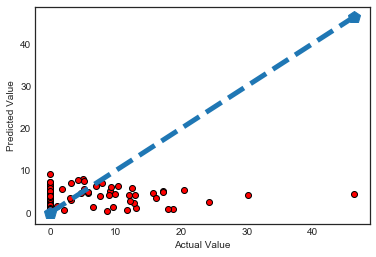

In [100]:
# Points were deviated from the Line
fig, ax = plt.subplots()
ax.scatter(y_val_cl_reg, y_pred_cl_reg, edgecolors=(0, 0, 0), color='red')
ax.plot([y_val_cl_reg.min(), y_val_cl_reg.max()], [y_val_cl_reg.min(), y_val_cl_reg.max()], 'p--', linewidth=5, markersize=12)
ax.set_xlabel('Actual Value')
ax.set_ylabel('Predicted Value')
plt.show()

# Results on Target Data (646 Records)

# 1.) Which clients have higher propensity to buy consumer loan? 

In [302]:
test_data['Client'] = test_data['Client'].astype(int)
Clients_Propensity_Buy_Consumer_Loan = test_data[['Client','Sex','Age','Tenure','Predicted_Sale_CL']].sort_values(by=['Predicted_Sale_CL'], ascending=False)
Clients_Propensity_Buy_Consumer_Loan.to_csv("ClientsList_Propensity_Buy_Consumer_Loan.csv")
Clients_Propensity_Buy_Consumer_Loan

Client  Sex   Age  Tenure  Predicted_Sale_CL
394      41    1  20.0     198           0.952652
324     674    0  31.0     263           0.920686
258     756    1  29.0     149           0.871503
404     350    0  41.0     218           0.860797
462     583    0  34.0     149           0.858297
..      ...  ...   ...     ...                ...
543    1313    1  76.0      74           0.064167
105    1339    1  80.0      86           0.062472
38      707    1  88.0      75           0.055344
454    1373    0  25.0      26           0.042558
79     1393    0  74.0     195           0.041652

[646 rows x 5 columns]

# 2.) Which clients have higher propensity to buy credit card?

In [303]:
Clients_Propensity_Buy_Credit_Card = test_data[['Client','Sex','Age','Tenure','Predicted_Sale_CC']].sort_values(by=['Predicted_Sale_CC'], ascending=False)
Clients_Propensity_Buy_Credit_Card.to_csv("ClientsList_Propensity_Buy_Credit_Card.csv")
Clients_Propensity_Buy_Credit_Card

Client  Sex   Age  Tenure  Predicted_Sale_CC
209     352    1  38.0     194           0.999889
294     197    1  70.0      58           0.999507
503     886    0  36.0     181           0.976607
301     587    0  53.0      83           0.931805
507     851    0  41.0      80           0.922358
..      ...  ...   ...     ...                ...
305    1416    1  61.0     132           0.025079
620     314    1  42.0     150           0.013938
197     878    0  41.0     173           0.004489
401    1226    0  82.0     211           0.003780
534    1569    0  41.0     152           0.001551

[646 rows x 5 columns]

# 3.) Which clients have higher propensity to buy mutual fund?

In [304]:
Clients_Propensity_Buy_Mutual_Fund = test_data[['Client','Sex','Age','Tenure','Predicted_Sale_MF']].sort_values(by=['Predicted_Sale_MF'], ascending=False)
Clients_Propensity_Buy_Mutual_Fund.to_csv("ClientsList_Propensity_Buy_Mutual_Fund.csv")
Clients_Propensity_Buy_Mutual_Fund

Client  Sex   Age  Tenure  Predicted_Sale_MF
559    1480    1  24.0      89           0.958032
534    1569    0  41.0     152           0.830114
420     866    1  21.0      83           0.795237
207     910    1  34.0      44           0.718938
242     389    1  43.0     158           0.685444
..      ...  ...   ...     ...                ...
395     523    0  38.0       0           0.007262
601      77    1  71.0       2           0.006132
251    1433    0  61.0       3           0.004440
329     246    1  62.0       0           0.001996
517     996    0  39.0       1           0.001394

[646 rows x 5 columns]

# 4.) Which clients are to be targeted with which offer? General description.

Maximize Revenue for Various Marketing Offers
The assumption was made that higher the Sale Propensity would lead to a higher Expected Revenue. Based on this consideration various expected revenues were calculated by multiplying the Propensity with Predicted Revenue (mean revenue) for every offer.

Below is the approach applied to every offer for calculation of Expected Revenue:

    Expected Revenue = Propensity to buy any offer * Predicted Revenue


In [305]:
rev_non_zero_cl = train_revenue[train_revenue['Revenue_CL'] > 0]
print("Mean of Revenue_CL: ", rev_non_zero_cl['Revenue_CL'].mean()) 

rev_non_zero_mf = train_revenue[train_revenue['Revenue_MF'] > 0]
print("Mean of Revenue_MF: ", rev_non_zero_mf['Revenue_MF'].mean()) 

rev_non_zero_cc = train_revenue[train_revenue['Revenue_CC'] > 0]
print("Mean of Revenue_CC: ",  rev_non_zero_cc['Revenue_CC'].mean())  

Mean of Revenue_CL:  12.043066502463049
Mean of Revenue_MF:  9.664974093264252
Mean of Revenue_CC:  10.86251623376623


We know from Statistics that Expected Value is the best Predictor.

In [306]:
test_data['Predicted_Revenue_CL'] = rev_non_zero_cl['Revenue_CL'].mean()
test_data['Predicted_Revenue_MF'] = rev_non_zero_mf['Revenue_MF'].mean()
test_data['Predicted_Revenue_CC'] = rev_non_zero_cc['Revenue_CC'].mean()

In [307]:
test_data['Expected_Revenue_CL'] = test_data.Predicted_Sale_CL * test_data.Predicted_Revenue_CL
test_data['Expected_Revenue_MF'] = test_data.Predicted_Sale_MF * test_data.Predicted_Revenue_MF
test_data['Expected_Revenue_CC'] = test_data.Predicted_Sale_CC * test_data.Predicted_Revenue_CC

In [308]:
#Selecting the required columns
required_data = test_data[['Client','Age','Tenure','Predicted_Sale_CL','Predicted_Sale_MF','Predicted_Sale_CC','Expected_Revenue_CL','Expected_Revenue_MF','Expected_Revenue_CC']]
required_data

Client   Age  Tenure  Predicted_Sale_CL  Predicted_Sale_MF  \
0       909  21.0      27           0.275419           0.268561   
1       699  37.0     175           0.537396           0.164073   
2       528  19.0      70           0.393233           0.263026   
3      1145  61.0      45           0.124883           0.133930   
4       517  41.0      28           0.376567           0.300592   
..      ...   ...     ...                ...                ...   
641     419  33.0      82           0.352766           0.281527   
642    1024  65.0      13           0.173332           0.153850   
643     464  68.0     153           0.207750           0.104948   
644     409  31.0      91           0.239309           0.187997   
645    1466  63.0      97           0.126849           0.168450   

     Predicted_Sale_CC  Expected_Revenue_CL  Expected_Revenue_MF  \
0             0.230225             3.316894             2.595633   
1             0.149525             6.471899             1.585761   
2             0.283753             4.735733             2.542141   
3             0.354797             1.503976             1.294427   
4             0.351346             4.535019             2.905210   
..                 ...                  ...                  ...   
641           0.252264             4.248381             2.720949   
642           0.159922             2.087454             1.486952   
643           0.175493             2.501942             1.014319   
644           0.290275             2.882012             1.816988   
645           0.189230             1.527645             1.628069   

     Expected_Revenue_CC  
0               2.500827  
1               1.624217  
2               3.082274  
3               3.853987  
4               3.816500  
..                   ...  
641             2.740220  
642             1.737152  
643             1.906293  
644             3.153115  
645             2.055518  

[646 rows x 9 columns]

In [279]:
def condition_check (x):
    if (x['Expected_Revenue_CL'] > x['Expected_Revenue_MF']) and (x['Expected_Revenue_CL']>x['Expected_Revenue_CC']) :
        return 'Consumer Loan', x['Expected_Revenue_CL']
    if  (x['Expected_Revenue_MF'] > x['Expected_Revenue_CL']) and (x['Expected_Revenue_MF']>x['Expected_Revenue_CC']) :
        return 'Mutual Fund', x['Expected_Revenue_MF']
    return 'Credit Card', x['Expected_Revenue_CC']

In [316]:
required_data['Target_Offer'] = required_data.apply(lambda x:condition_check(x)[0], axis=1)
required_data['Overall_Expected_Revenue'] = required_data.apply(lambda x:condition_check(x)[1], axis=1)

In [317]:
required_data['Target_Offer'].value_counts()

Consumer Loan    387
Credit Card      205
Mutual Fund       54
Name: Target_Offer, dtype: int64

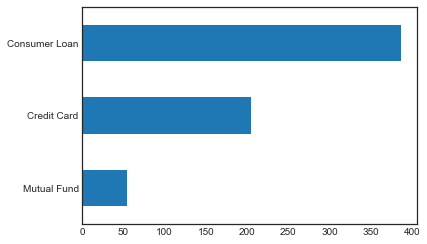

In [318]:
required_data.Target_Offer.value_counts().sort_values().plot(kind = 'barh')

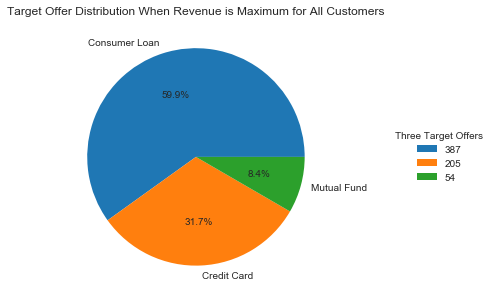

In [283]:
from matplotlib import pyplot as plt 
fig, ax = plt.subplots(figsize =(7, 5)) 
plt.pie(required_data['Target_Offer'].value_counts(), labels = required_data['Target_Offer'].value_counts().index, autopct='%1.1f%%')

ax.set_title("Target Offer Distribution When Revenue is Maximum for All Customers") 
# Adding legend 
ax.legend(required_data['Target_Offer'].value_counts(), 
          title ="Three Target Offers", 
          loc ="center left", 
          bbox_to_anchor =(1.2, 0, 0.5, 1)) 
  

plt.show()

In [319]:
required_100_Clients.columns

Index(['Client', 'Age', 'Tenure', 'Predicted_Sale_CL', 'Predicted_Sale_MF',
       'Predicted_Sale_CC', 'Expected_Revenue_CL', 'Expected_Revenue_MF',
       'Expected_Revenue_CC', 'Target_Offer', 'Overall_Expected_Revenue'],
      dtype='object')

In [321]:
# Top 100 Clients to be targeted with three Different Offers:
required_100_Clients = required_data[['Client', 'Age', 'Tenure','Target_Offer','Overall_Expected_Revenue']].sort_values(by=['Overall_Expected_Revenue'], ascending=False).head(100)
required_100_Clients.to_csv("Top100_Clients_to_be_Targeted_with_Various_Offers.csv")

In [309]:
required_100_Clients.columns

Index(['Client', 'Age', 'Tenure', 'Predicted_Sale_CL', 'Predicted_Sale_MF',
       'Predicted_Sale_CC', 'Expected_Revenue_CL', 'Expected_Revenue_MF',
       'Expected_Revenue_CC', 'Target_Offer', 'Overall_Expected_Revenue'],
      dtype='object')

# 5.) What would be the expected revenue based on your strategy - 835.50

In [286]:
required_100_Clients = required_data.sort_values(by=['Overall_Expected_Revenue'], ascending=False).head(100)
required_100_Clients['Target_Offer'].value_counts()

Consumer Loan    75
Credit Card      21
Mutual Fund       4
Name: Target_Offer, dtype: int64

Expected Revenue from various Marketing Offers for 100 Clients (15% of the Total Clients ot be Targted) On Target Data is 835.50

In [287]:
required_100_Clients['Overall_Expected_Revenue'].sum()

835.5029423062067

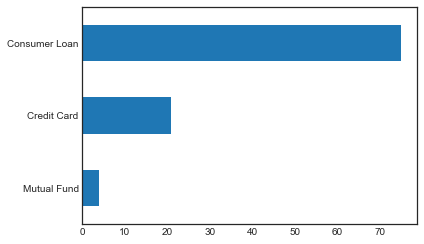

In [288]:
required_100_Clients.Target_Offer.value_counts().sort_values().plot(kind = 'barh')

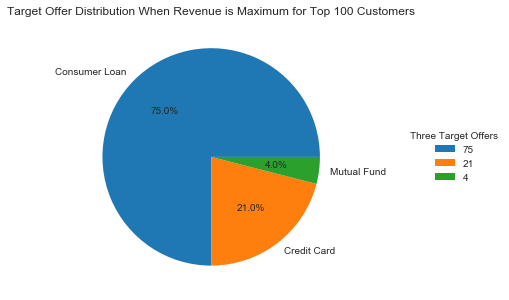

In [289]:
from matplotlib import pyplot as plt 
fig, ax = plt.subplots(figsize =(7, 5)) 
plt.pie(required_100_Clients['Target_Offer'].value_counts(), labels = required_100_Clients['Target_Offer'].value_counts().index, autopct='%1.1f%%')

ax.set_title("Target Offer Distribution When Revenue is Maximum for Top 100 Customers") 
# Adding legend 
ax.legend(required_100_Clients['Target_Offer'].value_counts(), 
          title ="Three Target Offers", 
          loc ="center left", 
          bbox_to_anchor =(1.2, 0, 0.5, 1)) 
  

plt.show()

# Insights about the Results obtained from Case Study - Data Visualization

In [290]:
revenue_analysis = df[~df['Revenue_CL'].isna()]
revenue_analysis = revenue_analysis.reset_index(drop=True)

In [291]:
target_data_insights = pd.merge(test_bkp[['Client', 'Sex', 'Age', 'Tenure', 'Count_CA', 'Count_SA', 'Count_MF',
       'Count_OVD', 'Count_CC', 'Count_CL', 'ActBal_CA', 'ActBal_SA',
       'ActBal_MF', 'ActBal_OVD', 'ActBal_CC', 'ActBal_CL', 'VolumeCred_CA',
       'TransactionsCred_CA', 'VolumeDeb_CA', 'VolumeDebCash_Card',
       'VolumeDebCashless_Card', 'VolumeDeb_PaymentOrder',
       'TransactionsDeb_CA', 'TransactionsDebCash_Card',
       'TransactionsDebCashless_Card', 'TransactionsDeb_PaymentOrder']], test_data[['Client','Expected_Revenue_CL','Expected_Revenue_MF','Expected_Revenue_CC']],  how='left')
target_data_insights

Client  Sex   Age  Tenure  Count_CA  Count_SA  Count_MF  Count_OVD  \
0       909    1  21.0      27         1       0.0       0.0        1.0   
1       699    1  37.0     175         1       0.0       4.0        1.0   
2       528    0  19.0      70         1       0.0       0.0        1.0   
3      1145    1  61.0      45         1       0.0       0.0        0.0   
4       517    0  41.0      28         1       0.0       0.0        0.0   
..      ...  ...   ...     ...       ...       ...       ...        ...   
641     419    0  33.0      82         1       0.0       0.0        1.0   
642    1024    1  65.0      13         1       0.0       0.0        0.0   
643     464    1  68.0     153         2       0.0       0.0        1.0   
644     409    1  31.0      91         1       0.0       0.0        1.0   
645    1466    1  63.0      97         1       0.0       0.0        1.0   

     Count_CC  Count_CL  ...  VolumeDebCash_Card  VolumeDebCashless_Card  \
0         0.0       1.0  ...           -0.105004               -0.503203   
1         0.0       0.0  ...           -0.271530               -0.503203   
2         0.0       0.0  ...           -0.204920               -0.245607   
3         0.0       0.0  ...           -0.438056               -0.503203   
4         0.0       0.0  ...           -0.304836                0.311836   
..        ...       ...  ...                 ...                     ...   
641       0.0       0.0  ...           -0.438056               -0.503203   
642       0.0       0.0  ...           -0.238225               -0.503203   
643       0.0       0.0  ...           -0.138310               -0.265318   
644       0.0       0.0  ...           -0.105004               -0.461698   
645       0.0       0.0  ...           -0.304836               -0.418791   

     VolumeDeb_PaymentOrder  TransactionsDeb_CA  TransactionsDebCash_Card  \
0                 -0.158858                 7.0                       1.0   
1                 -0.143870                10.0                       2.0   
2                 -0.151635                10.0                       4.0   
3                 -0.208470                 1.0                       0.0   
4                 -0.133658                17.0                       2.0   
..                      ...                 ...                       ...   
641               -0.208470                 5.0                       0.0   
642               -0.208470                 3.0                       2.0   
643               -0.104863                12.0                       2.0   
644               -0.127541                12.0                       1.0   
645               -0.051687                 6.0                       1.0   

     TransactionsDebCashless_Card  TransactionsDeb_PaymentOrder  \
0                             0.0                           4.0   
1                             0.0                           5.0   
2                             3.0                           2.0   
3                             0.0                           0.0   
4                            10.0                           3.0   
..                            ...                           ...   
641                           0.0                           0.0   
642                           0.0                           0.0   
643                           3.0                           6.0   
644                           1.0                           9.0   
645                           1.0                           3.0   

     Expected_Revenue_CL  Expected_Revenue_MF  Expected_Revenue_CC  
0               3.316894             2.595633             2.500827  
1               6.471899             1.585761             1.624217  
2               4.735733             2.542141             3.082274  
3               1.503976             1.294427             3.853987  
4               4.535019             2.905210             3.816500  
..                   ...                  ...  

In [292]:
target_data_insights[['Client','Sex','Age', 'Tenure', 'ActBal_CA', 'ActBal_SA','TransactionsCred_CA','TransactionsDeb_CA', 'TransactionsDebCash_Card','TransactionsDebCashless_Card', 'TransactionsDeb_PaymentOrder','ActBal_MF','Expected_Revenue_CL']].sort_values(by=['Expected_Revenue_CL'], ascending=False).head(10)

Client  Sex   Age  Tenure  ActBal_CA  ActBal_SA  TransactionsCred_CA  \
394      41    1  20.0     198  -0.265923   -0.23528                  4.0   
324     674    0  31.0     263   1.722711   -0.23528                 10.0   
258     756    1  29.0     149  -0.070675   -0.23528                 30.0   
404     350    0  41.0     218  -0.289902   -0.23528                 22.0   
462     583    0  34.0     149  -0.256550   -0.23471                 30.0   
93      342    0  26.0     203   0.378703   -0.23528                  3.0   
624    1119    0  22.0     177   0.122488   -0.23528                 18.0   
514      57    1  28.0     157  -0.147807   -0.23528                 20.0   
293    1597    1  19.0     181   0.429016   -0.23528                  9.0   
224     780    1  19.0     127  -0.267171   -0.23528                 16.0   

     TransactionsDeb_CA  TransactionsDebCash_Card  \
394                18.0                       6.0   
324                39.0                       3.0   
258                53.0                       6.0   
404                20.0                       4.0   
462                17.0                       0.0   
93                 21.0                       3.0   
624                52.0                       1.0   
514                 6.0                       1.0   
293                17.0                       3.0   
224                15.0                       5.0   

     TransactionsDebCashless_Card  TransactionsDeb_PaymentOrder  ActBal_MF  \
394                           7.0                           1.0  -0.104797   
324                          22.0                          13.0  -0.104797   
258                          23.0                          14.0  -0.038398   
404                           0.0                           7.0  -0.104797   
462                           5.0                          11.0   0.268609   
93                           12.0                           3.0   0.166755   
624                          32.0                          15.0  -0.104797   
514                           2.0                           1.0  -0.104797   
293                           6.0                           4.0  -0.104797   
224                           0.0                           5.0  -0.104797   

     Expected_Revenue_CL  
394            11.472847  
324            11.087887  
258            10.495565  
404            10.366630  
462            10.336533  
93             10.286702  
624            10.139625  
514             9.964058  
293             9.728832  
224             9.623104

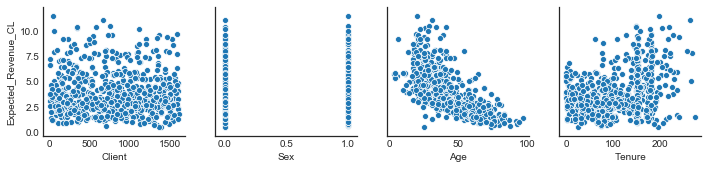

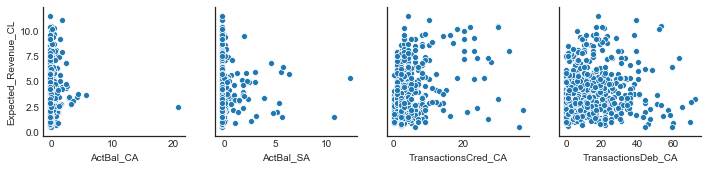

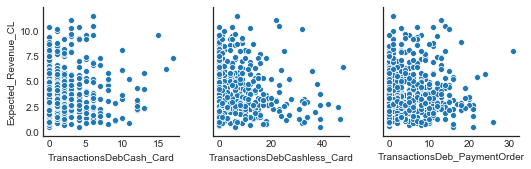

In [293]:
import seaborn as sns
sns.pairplot(data=target_data_insights,
                  y_vars=['Expected_Revenue_CL'],
                  x_vars=['Client','Sex','Age', 'Tenure'])


sns.pairplot(data=target_data_insights,
                  y_vars=['Expected_Revenue_CL'],
                  x_vars=['ActBal_CA', 'ActBal_SA','TransactionsCred_CA','TransactionsDeb_CA'])

sns.pairplot(data=target_data_insights,
                  y_vars=['Expected_Revenue_CL'],
                  x_vars=[ 'TransactionsDebCash_Card','TransactionsDebCashless_Card', 'TransactionsDeb_PaymentOrder'])

In [294]:
target_data_insights[['Client','Sex','Age', 'Tenure', 'ActBal_CA', 'ActBal_SA','TransactionsCred_CA','TransactionsDeb_CA', 'TransactionsDebCash_Card','TransactionsDebCashless_Card', 'TransactionsDeb_PaymentOrder','ActBal_MF','Expected_Revenue_MF']].sort_values(by=['Expected_Revenue_MF'], ascending=False).head(10)

Client  Sex   Age  Tenure  ActBal_CA  ActBal_SA  TransactionsCred_CA  \
559    1480    1  24.0      89  -0.260958  -0.235280                  9.0   
534    1569    0  41.0     152   1.474134  -0.232303                  2.0   
420     866    1  21.0      83  -0.074489  -0.235280                  5.0   
207     910    1  34.0      44   0.080046  -0.169412                  4.0   
242     389    1  43.0     158  -0.286800   5.531498                  3.0   
624    1119    0  22.0     177   0.122488  -0.235280                 18.0   
413     188    0  30.0      53  -0.197815  -0.235280                 26.0   
88      791    0  16.0      23  -0.177936  -0.024406                  2.0   
418     354    1  43.0      68  -0.244224   1.318849                  8.0   
401    1226    0  82.0     211  -0.285509  -0.235280                  8.0   

     TransactionsDeb_CA  TransactionsDebCash_Card  \
559                65.0                       6.0   
534                20.0                       0.0   
420                70.0                      12.0   
207                12.0                       3.0   
242                 6.0                       2.0   
624                52.0                       1.0   
413                33.0                       4.0   
88                  3.0                       0.0   
418                44.0                       4.0   
401                22.0                       6.0   

     TransactionsDebCashless_Card  TransactionsDeb_PaymentOrder  ActBal_MF  \
559                          46.0                          12.0  -0.104797   
534                          13.0                           6.0   1.143431   
420                          34.0                          15.0  -0.104797   
207                          32.0                           5.0  -0.104797   
242                           0.0                           1.0  -0.104797   
624                          32.0                          15.0  -0.104797   
413                          14.0                           8.0  -0.104797   
88                            9.0                           0.0   0.147422   
418                          37.0                           2.0  -0.104797   
401                          47.0                          10.0   0.340832   

     Expected_Revenue_MF  
559             9.259351  
534             8.023034  
420             7.685944  
207             6.948513  
242             6.624796  
624             6.552089  
413             6.022786  
88              5.898823  
418             5.814841  
401             5.581195

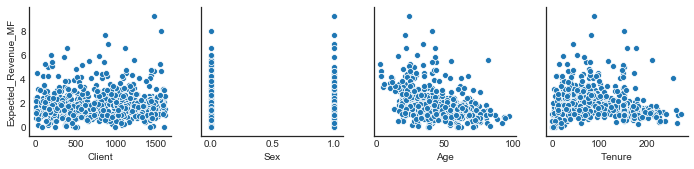

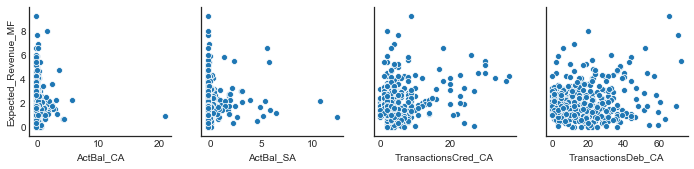

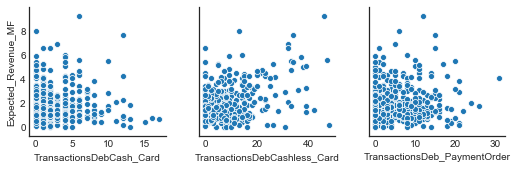

In [295]:
import seaborn as sns
sns.pairplot(data=target_data_insights,
                  y_vars=['Expected_Revenue_MF'],
                  x_vars=['Client','Sex','Age', 'Tenure'])


sns.pairplot(data=target_data_insights,
                  y_vars=['Expected_Revenue_MF'],
                  x_vars=['ActBal_CA', 'ActBal_SA','TransactionsCred_CA','TransactionsDeb_CA'])

sns.pairplot(data=target_data_insights,
                  y_vars=['Expected_Revenue_MF'],
                  x_vars=[ 'TransactionsDebCash_Card','TransactionsDebCashless_Card', 'TransactionsDeb_PaymentOrder'])

In [296]:
target_data_insights[['Client','Sex','Age', 'Tenure', 'ActBal_CA', 'ActBal_SA','TransactionsCred_CA','TransactionsDeb_CA', 'TransactionsDebCash_Card','TransactionsDebCashless_Card', 'TransactionsDeb_PaymentOrder','ActBal_MF','Expected_Revenue_CC']].sort_values(by=['Expected_Revenue_CC'], ascending=False).head(10)

Client  Sex   Age  Tenure  ActBal_CA  ActBal_SA  TransactionsCred_CA  \
209     352    1  38.0     194  -0.064405  12.334814                  2.0   
294     197    1  70.0      58  -0.205487  10.743132                  9.0   
503     886    0  36.0     181  -0.269127   6.358633                  4.0   
301     587    0  53.0      83  -0.289902   5.303922                  3.0   
507     851    0  41.0      80  -0.199752   5.685589                  1.0   
421    1455    1  39.0     151  -0.284630  -0.235280                  3.0   
52       19    0  46.0      94   2.922570   3.871018                  2.0   
84      199    0  47.0     151  -0.271228  -0.235280                  3.0   
576     535    1  39.0     151  -0.288717   5.772590                  7.0   
512     340    0  76.0      80   0.002839   2.632125                  2.0   

     TransactionsDeb_CA  TransactionsDebCash_Card  \
209                14.0                       1.0   
294                11.0                       0.0   
503                25.0                       3.0   
301                 5.0                       0.0   
507                43.0                       4.0   
421                32.0                       1.0   
52                  5.0                       0.0   
84                 41.0                       4.0   
576                10.0                       2.0   
512                 3.0                       0.0   

     TransactionsDebCashless_Card  TransactionsDeb_PaymentOrder  ActBal_MF  \
209                           8.0                           4.0  -0.104797   
294                           0.0                           3.0  -0.104797   
503                           9.0                          11.0  -0.104797   
301                           0.0                           5.0  -0.093902   
507                          34.0                           0.0  -0.104797   
421                          23.0                           6.0  -0.104797   
52                            0.0                           4.0  -0.104797   
84                           12.0                           3.0  -0.104797   
576                           0.0                           7.0  -0.104797   
512                           2.0                           0.0  -0.104797   

     Expected_Revenue_CC  
209            10.861314  
294            10.857157  
503            10.608413  
301            10.121750  
507            10.019128  
421             9.835800  
52              9.577350  
84              9.568098  
576             9.134599  
512             8.643551

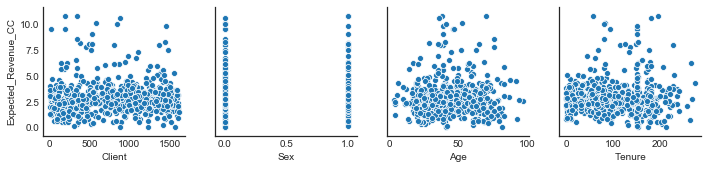

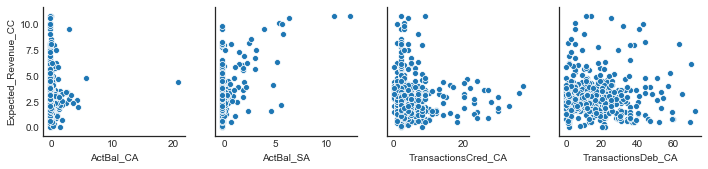

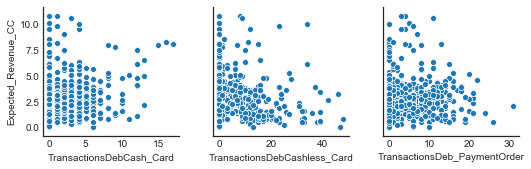

In [297]:
import seaborn as sns
sns.pairplot(data=target_data_insights,
                  y_vars=['Expected_Revenue_CC'],
                  x_vars=['Client','Sex','Age', 'Tenure'])


sns.pairplot(data=target_data_insights,
                  y_vars=['Expected_Revenue_CC'],
                  x_vars=['ActBal_CA', 'ActBal_SA','TransactionsCred_CA','TransactionsDeb_CA'])

sns.pairplot(data=target_data_insights,
                  y_vars=['Expected_Revenue_CC'],
                  x_vars=[ 'TransactionsDebCash_Card','TransactionsDebCashless_Card', 'TransactionsDeb_PaymentOrder'])


In [298]:
required_data.columns

Index(['Client', 'Age', 'Tenure', 'Predicted_Sale_CL', 'Predicted_Sale_MF',
       'Predicted_Sale_CC', 'Expected_Revenue_CL', 'Expected_Revenue_MF',
       'Expected_Revenue_CC', 'Target_Offer', 'Overall_Expected_Revenue'],
      dtype='object')

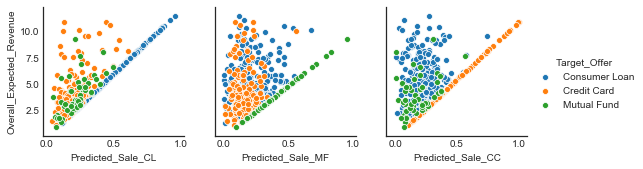

In [299]:
import seaborn as sns
sns.pairplot(data=required_data,
                  y_vars=['Overall_Expected_Revenue'],
                  x_vars=['Predicted_Sale_CL','Predicted_Sale_MF', 'Predicted_Sale_CC'], hue='Target_Offer')
plt.show()

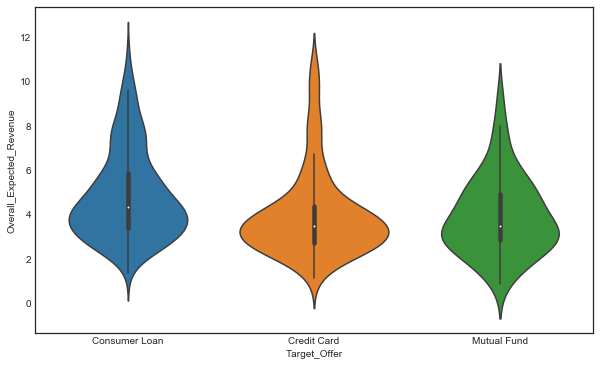

In [300]:
plt.figure(figsize=(10,6))
sns.violinplot(x="Target_Offer", y="Overall_Expected_Revenue", data=required_data, size=5)

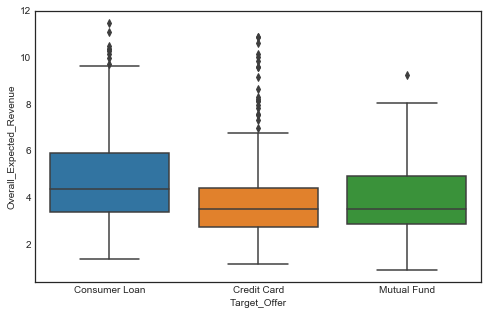

In [301]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Target_Offer", y="Overall_Expected_Revenue", data=required_data)